Імпорт бібліотек та підготовка середовища

In [13]:
# Імпорт бібліотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix

In [14]:
# Завантаження даних
titanic = sns.load_dataset('titanic')

# Ознайомлення з даними
print(titanic.head(10))
print(titanic.describe())
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

Попередня обробка даних

In [15]:
# Заповнення пропущених значень
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# One-Hot Encoding для категоріальних змінних
titanic = pd.get_dummies(
    titanic,
    columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive', 'alone'],
    drop_first=True
)

# Створення нової ознаки FamilySize
titanic['family_size'] = titanic['sibsp'] + titanic['parch']

# Видалення непотрібних стовпців
titanic.drop(columns=['sibsp', 'parch'], inplace=True)

# Перевірка типів даних та пропущених значень
print(titanic.dtypes)
print(titanic.isnull().sum())

survived                     int64
pclass                       int64
age                        float64
fare                       float64
adult_male                    bool
sex_male                      bool
embarked_Q                    bool
embarked_S                    bool
class_Second                  bool
class_Third                   bool
who_man                       bool
who_woman                     bool
deck_B                        bool
deck_C                        bool
deck_D                        bool
deck_E                        bool
deck_F                        bool
deck_G                        bool
embark_town_Queenstown        bool
embark_town_Southampton       bool
alive_yes                     bool
alone_True                    bool
family_size                  int64
dtype: object
survived                   0
pclass                     0
age                        0
fare                       0
adult_male                 0
sex_male                   0
embarke

Поділ даних на тренувальну та тестову вибірки

In [16]:
# Поділ на ознаки та цільову змінну
X = titanic.drop(columns=['survived'])  # Видаляємо цільову змінну
y = titanic['survived']

# Поділ на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Тренування моделі: Логістична регресія

In [17]:
# Логістична регресія
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Оцінка моделі
print("Логістична регресія:")
print(classification_report(y_test, y_pred_log))

Логістична регресія:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Тренування моделі: Дерева рішень

In [18]:
# Дерева рішень
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Оцінка моделі
print("Дерева рішень:")
print(classification_report(y_test, y_pred_tree))

Дерева рішень:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Тренування моделі: Випадкові ліси

In [19]:
# Випадкові ліси
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Оцінка моделі
print("Випадкові ліси:")
print(classification_report(y_test, y_pred_rf))

Випадкові ліси:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Побудова ROC-кривих

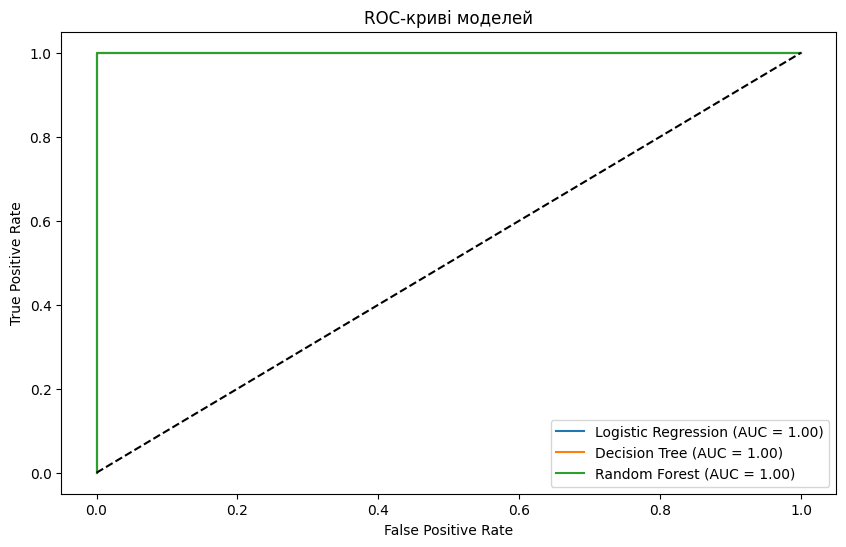

In [20]:
plt.figure(figsize=(10, 6))
for model, y_pred, label in [
    (log_reg, log_reg.predict_proba(X_test)[:, 1], 'Logistic Regression'),
    (tree_clf, tree_clf.predict_proba(X_test)[:, 1], 'Decision Tree'),
    (rf_clf, rf_clf.predict_proba(X_test)[:, 1], 'Random Forest')
]:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-криві моделей')
plt.legend()
plt.show()

Крос-валідація для логістичної регресії

In [21]:
from sklearn.model_selection import cross_val_score

# Крос-валідація
scores = cross_val_score(log_reg, X, y, cv=5)
print(f'Крос-валідація для логістичної регресії: {scores.mean():.2f}')

Крос-валідація для логістичної регресії: 1.00


Оптимізація моделі: Випадкові ліси

In [22]:
from sklearn.model_selection import GridSearchCV

# Підбір гіперпараметрів для випадкових лісів
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f'Найкращі параметри для Random Forest: {grid_search.best_params_}')

Найкращі параметри для Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


Аналіз важливості ознак

In [23]:
# Аналіз важливості ознак
importances = rf_clf.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

print("Важливість ознак для Random Forest:")
for idx in sorted_indices:
    print(f'{feature_names[idx]}: {importances[idx]:.4f}')

Важливість ознак для Random Forest:
alive_yes: 0.5905
adult_male: 0.0582
who_man: 0.0560
sex_male: 0.0558
fare: 0.0510
who_woman: 0.0452
age: 0.0346
pclass: 0.0296
class_Third: 0.0237
family_size: 0.0206
class_Second: 0.0051
deck_E: 0.0047
alone_True: 0.0044
embark_town_Southampton: 0.0041
deck_B: 0.0040
embarked_S: 0.0031
deck_D: 0.0027
deck_C: 0.0021
embarked_Q: 0.0018
embark_town_Queenstown: 0.0011
deck_F: 0.0010
deck_G: 0.0006
